In [987]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [988]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [989]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [990]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [991]:
data.drop('Healthcare_1', axis=1, inplace = True)
data.loc[data['HouseYear']==20052011,'HouseYear']=2008
data.loc[data['HouseYear']==4968,'HouseYear']=1968

In [992]:
data.loc[data.Rooms>5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [993]:
data.loc[data.Rooms==19, 'Rooms'] = 1
data.loc[data.Rooms==10, 'Rooms'] = 2

In [994]:
data.loc[data.Square<15]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261


In [996]:
data.loc[data.LifeSquare>data.Square.max()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366


In [997]:
data.Square.max()

641.0651927456407

In [998]:
data.loc[4323, 'LifeSquare'] = data.loc[4323, 'LifeSquare']/100

In [999]:
index_array_lifesquare=data.loc[data.LifeSquare.isna()].index

In [1000]:
data.drop(index_array_lifesquare, axis=0, inplace=True)

In [1001]:
index_large_kitchen=data.loc[data.KitchenSquare>100].index
data.drop(index_large_kitchen, axis=0, inplace=True)

In [1002]:
data.loc[data.Floor>data.HouseFloor, 'HouseFloor'] = data.loc[data.Floor>data.HouseFloor, 'Floor']

In [1003]:
train,valid=train_test_split(data,test_size=0.3,random_state=42)

In [1004]:
train.shape, valid.shape

((5517, 19), (2365, 19))

In [1005]:
scaler=MinMaxScaler()

In [1006]:
train_scaled=scaler.fit_transform(train.loc[:,['HouseYear','DistrictId']])

In [1007]:
train_scaled

array([[0.76851852, 0.43269231],
       [0.48148148, 0.21634615],
       [0.4537037 , 0.21634615],
       ...,
       [0.98148148, 0.25      ],
       [0.87962963, 0.12980769],
       [0.93518519, 0.19711538]])

In [1008]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=42)
    temp_model.fit(train_scaled)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

235.58426047690992
137.98348817045172
108.02263676011168
82.13944212226605
69.4061843777748
58.663997978165554
51.23843098230012
46.25576977991484


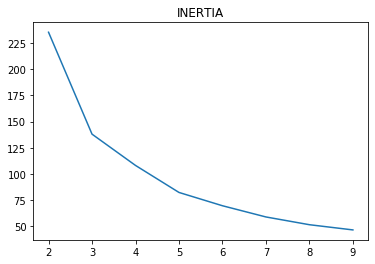

In [1009]:
plt.plot([i for i in range(2,10)],inertia_arr)
plt.title('INERTIA');

In [1010]:
from sklearn.cluster import AgglomerativeClustering

In [1011]:
model=AgglomerativeClustering(n_clusters=5)

In [1012]:
train['cluster_year']=model.fit_predict(train_scaled)

Text(0.5, 1.0, 'TRAIN')

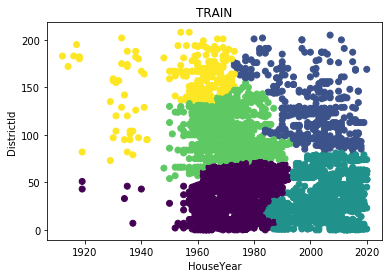

In [1013]:
plt.scatter(train['HouseYear'],train['DistrictId'],c=train['cluster_year'])
plt.xlabel('HouseYear')
plt.ylabel('DistrictId')
plt.title('TRAIN')

In [1014]:
from sklearn.neighbors import KNeighborsClassifier

In [1015]:
knn=KNeighborsClassifier(n_neighbors=5)

In [1016]:
%%time
knn.fit(train_scaled,train['cluster_year'])

Wall time: 4.99 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [1017]:
valid_scaled=scaler.transform(valid.loc[:,['HouseYear','DistrictId']])

In [1018]:
valid['cluster_year']=knn.predict(valid_scaled)

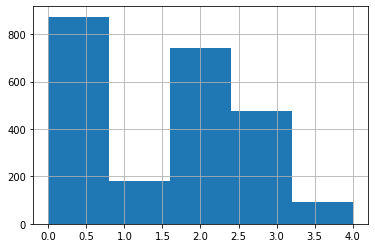

In [1019]:
valid.cluster_year.hist(bins=5)

In [1020]:
distr_info1=train.DistrictId.value_counts().reset_index().rename(columns={'index':'DistrictId','DistrictId':'large_district'})
distr_info1.head(15)

,DistrictId,large_district
0,27,378
1,23,184
2,1,174
3,9,161
4,6,149
5,21,121
6,8,104
7,53,103
8,11,96
9,46,90


In [1021]:
distr_info1['is_large']=(distr_info1['large_district']>100).astype(int)

In [1022]:
distr_info1.head()

,DistrictId,large_district,is_large
0,27,378,1
1,23,184,1
2,1,174,1
3,9,161,1
4,6,149,1


In [1023]:
def add_distr_info1(df,distr_info1):
    df=pd.merge(df,distr_info1,on='DistrictId',how='left')
    df['is_large']=df['is_large'].fillna(0)
    df['large_district']=df['large_district'].fillna(1)
    return df

In [1024]:
price=train['Price'].mean()
price

224245.22934004286

In [1025]:
price_mean_by_rooms=train.groupby(['Rooms'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_rooms'})

In [1026]:
price_mean_by_rooms

,Rooms,mean_price_by_rooms
0,0.0,201772.057834
1,1.0,166587.097295
2,2.0,222145.603609
3,3.0,300600.773916
4,4.0,378156.573209
5,5.0,425700.915605
6,6.0,229661.964416


In [1027]:
price_mean_by_distr_rooms=train.groupby(['DistrictId','Rooms'],as_index=False).agg({'Price':'mean'}).rename(columns={'Price':'mean_price_by_dr'})

In [1028]:
price_mean_by_distr_rooms.head()

,DistrictId,Rooms,mean_price_by_dr
0,0,1.0,135178.234385
1,0,2.0,212180.123578
2,0,3.0,304170.518823
3,1,1.0,146140.129340
4,1,2.0,190521.634089


In [1029]:
def add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=pd.merge(df,price_mean_by_distr_rooms,on=['DistrictId','Rooms'],how='left')
    df=pd.merge(df,price_mean_by_rooms,on='Rooms',how='left')
    df['mean_price_by_dr']=df['mean_price_by_dr'].fillna(df['mean_price_by_rooms'])
    df['mean_price_by_dr']=df['mean_price_by_dr'].fillna(price)
    df['mean_price_by_rooms']=df['mean_price_by_rooms'].fillna(price)
    return df   

In [1030]:
def prepare_data(df,distr_info1,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=add_distr_info1(df,distr_info1)
    df=add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price)
    return df

In [1031]:
train=prepare_data(train,distr_info1,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [1032]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5517 entries, 0 to 5516
Data columns (total 24 columns):
Id                     5517 non-null int64
DistrictId             5517 non-null int64
Rooms                  5517 non-null float64
Square                 5517 non-null float64
LifeSquare             5517 non-null float64
KitchenSquare          5517 non-null float64
Floor                  5517 non-null int64
HouseFloor             5517 non-null float64
HouseYear              5517 non-null int64
Ecology_1              5517 non-null float64
Ecology_2              5517 non-null object
Ecology_3              5517 non-null object
Social_1               5517 non-null int64
Social_2               5517 non-null int64
Social_3               5517 non-null int64
Helthcare_2            5517 non-null int64
Shops_1                5517 non-null int64
Shops_2                5517 non-null object
Price                  5517 non-null float64
cluster_year           5517 non-null int32
large_district  

In [1033]:
def dummies(df,cluster_year='cluster_year'):
    df[cluster_year]=df[cluster_year].astype(object)
    df=pd.get_dummies(df)
    return df

In [1034]:
train=dummies(train)

In [1035]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5517 entries, 0 to 5516
Data columns (total 31 columns):
Id                     5517 non-null int64
DistrictId             5517 non-null int64
Rooms                  5517 non-null float64
Square                 5517 non-null float64
LifeSquare             5517 non-null float64
KitchenSquare          5517 non-null float64
Floor                  5517 non-null int64
HouseFloor             5517 non-null float64
HouseYear              5517 non-null int64
Ecology_1              5517 non-null float64
Social_1               5517 non-null int64
Social_2               5517 non-null int64
Social_3               5517 non-null int64
Helthcare_2            5517 non-null int64
Shops_1                5517 non-null int64
Price                  5517 non-null float64
large_district         5517 non-null int64
is_large               5517 non-null int32
mean_price_by_dr       5517 non-null float64
mean_price_by_rooms    5517 non-null float64
Ecology_2_A    

In [1036]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'large_district',
       'is_large', 'mean_price_by_dr', 'mean_price_by_rooms', 'Ecology_2_A',
       'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B',
       'cluster_year_0', 'cluster_year_1', 'cluster_year_2', 'cluster_year_3',
       'cluster_year_4'],
      dtype='object')

In [1037]:
feats=['large_district', 'is_large', 'mean_price_by_dr', 'mean_price_by_rooms',
'cluster_year_0', 'cluster_year_1', 'cluster_year_2',       'cluster_year_3', 'cluster_year_4']

In [1038]:
from sklearn.ensemble import RandomForestRegressor as RF

In [1039]:
from sklearn.model_selection import GridSearchCV

In [1040]:
params={
        'min_samples_leaf':[3,5,7],
        'n_estimators':[25,50,75],
        'max_depth':[3,5,7]    
        }
regr=GridSearchCV(RF(),param_grid=params,cv=2)

In [1041]:
%%time
regr.fit(train.loc[:,feats],train['Price'])

Wall time: 14.3 s


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7], 'min_sa

In [1042]:
regr.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 50}

In [1043]:
regr.best_score_

0.6617583601984405

In [1044]:
train.loc[:,feats].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5517 entries, 0 to 5516
Data columns (total 9 columns):
large_district         5517 non-null int64
is_large               5517 non-null int32
mean_price_by_dr       5517 non-null float64
mean_price_by_rooms    5517 non-null float64
cluster_year_0         5517 non-null uint8
cluster_year_1         5517 non-null uint8
cluster_year_2         5517 non-null uint8
cluster_year_3         5517 non-null uint8
cluster_year_4         5517 non-null uint8
dtypes: float64(2), int32(1), int64(1), uint8(5)
memory usage: 220.9 KB


In [1045]:
model=RF(n_estimators=75,max_depth=5,min_samples_leaf=5, random_state = 42)

In [1046]:
%%time
model.fit(train.loc[:,feats],train['Price'])

Wall time: 748 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=75,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [1047]:
valid=prepare_data(valid,distr_info1,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [1048]:
valid=dummies(valid)

In [1049]:
y_pred=model.predict(valid.loc[:,feats])

In [1050]:
y_pred

array([195035.24100066, 139644.20919812, 212932.57767949, ...,
       190192.70596862, 259302.60879906, 399952.09847072])

In [1051]:
from sklearn.metrics import r2_score as r2

In [1052]:
r2(valid['Price'],y_pred)

0.4616456790166016

In [1053]:
r2(train['Price'], model.predict(train.loc[:,feats]))

0.6823862995364431

In [1054]:
test_scaled=scaler.transform(test.loc[:,['HouseYear','DistrictId']])
test['cluster_year']=knn.predict(test_scaled)

In [1055]:
test=prepare_data(test,distr_info1,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [1056]:
test=dummies(test)

In [1057]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 31 columns):
Id                     5000 non-null int64
DistrictId             5000 non-null int64
Rooms                  5000 non-null float64
Square                 5000 non-null float64
LifeSquare             3959 non-null float64
KitchenSquare          5000 non-null float64
Floor                  5000 non-null int64
HouseFloor             5000 non-null float64
HouseYear              5000 non-null int64
Ecology_1              5000 non-null float64
Social_1               5000 non-null int64
Social_2               5000 non-null int64
Social_3               5000 non-null int64
Healthcare_1           2623 non-null float64
Helthcare_2            5000 non-null int64
Shops_1                5000 non-null int64
large_district         5000 non-null float64
is_large               5000 non-null float64
mean_price_by_dr       5000 non-null float64
mean_price_by_rooms    5000 non-null float64
Ecology_2_A

In [1058]:
test['Price']=model.predict(test.loc[:,feats])

In [1059]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,cluster_year_0,cluster_year_1,cluster_year_2,cluster_year_3,cluster_year_4,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,0,1,0,1,1,0,0,0,0,172483.461904
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,...,0,1,0,1,0,0,0,1,0,224497.681738
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,0,1,0,1,0,0,0,0,1,164784.116220
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,0,1,0,1,0,0,1,0,0,213777.920536
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,0,1,1,0,0,0,1,0,0,123608.905858


In [1060]:
test.loc[:,['Id','Price']].to_csv('NBurzueva_predictions.csv',index=False) 

In [1061]:
pd.read_csv('NBurzueva_predictions.csv')

,Id,Price
0,725,172483.461904
1,15856,224497.681738
2,5480,164784.116220
3,15664,213777.920536
4,14275,123608.905858
5,7633,194275.070330
6,13329,127344.604034
7,5502,220038.229808
8,4220,318872.469559
9,11538,219069.211476
